In [6]:
%matplotlib inline
import pandas as pd
import numpy as np 

Reading data from a CSV file

In [7]:
df = pd.read_csv('before_encoding.csv')
df.head()

,Time,day_name,Duration,ESI Score,PatientCount,Disposition
0,00:02:00,Friday,40.55,2,254,T
1,00:35:00,Friday,3.00,3,15,LWOT
2,00:44:00,Friday,3.00,3,14,LWOT
3,00:47:00,Friday,3.00,3,13,LWOT
4,00:53:00,Friday,3.00,3,12,LWOT


Encoding day_name

In [8]:
df=pd.get_dummies(df, prefix=['day_name'], columns=['day_name'])

Encoding Disposition

In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Disposition'] = labelencoder.fit_transform(df['Disposition'])
df.head()

,Time,Duration,ESI Score,PatientCount,Disposition,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,00:02:00,40.55,2,254,1,1,0,0,0,0,0,0
1,00:35:00,3.00,3,15,0,1,0,0,0,0,0,0
2,00:44:00,3.00,3,14,0,1,0,0,0,0,0,0
3,00:47:00,3.00,3,13,0,1,0,0,0,0,0,0
4,00:53:00,3.00,3,12,0,1,0,0,0,0,0,0


Changing the hour column's data type to date time

In [10]:
df['hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
df.head()

,Time,Duration,ESI Score,PatientCount,Disposition,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,hour
0,00:02:00,40.55,2,254,1,1,0,0,0,0,0,0,0
1,00:35:00,3.00,3,15,0,1,0,0,0,0,0,0,0
2,00:44:00,3.00,3,14,0,1,0,0,0,0,0,0,0
3,00:47:00,3.00,3,13,0,1,0,0,0,0,0,0,0
4,00:53:00,3.00,3,12,0,1,0,0,0,0,0,0,0


Dropping the time column

In [11]:
df.drop(columns=["Time"],axis=1,inplace=True)

Encoding the hour column

In [12]:
df=pd.get_dummies(df, prefix=['hour'], columns=['hour'])

Splitting the dataframe into train test

In [13]:
X=df
X=X.drop(["Disposition"],axis=1)
y=df["Disposition"]
X.head()

,Duration,ESI Score,PatientCount,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,40.55,2,254,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.00,3,15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.00,3,14,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.00,3,13,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.00,3,12,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
    from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Random Forest

In [15]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

Hyper Parameter tuning

In [16]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [17]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [18]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

In [19]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [20]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  12.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.5s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  10.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   9.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  11.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  13.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  16.3s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   7.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   7.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   6.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   7.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   6.6s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  8.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [21]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [22]:
rf_random.best_score_

-0.0014075877802969747

In [23]:
clf=RandomForestClassifier(n_estimators=300,min_samples_split=100,min_samples_leaf= 5, max_features= 'auto', max_depth= 15 )

In [24]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
import pickle
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(clf, file)

In [26]:
y_pred=clf.predict(X_test)

In [27]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9981819248137939


In [28]:
X.columns

Index(['Duration', 'ESI Score', 'PatientCount', 'day_name_Friday',
       'day_name_Monday', 'day_name_Saturday', 'day_name_Sunday',
       'day_name_Thursday', 'day_name_Tuesday', 'day_name_Wednesday', 'hour_0',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23'],
      dtype='object')

In [39]:
clf.predict([[24, 5, 45, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


array([1])

confusion matrix

In [30]:
y_predicted = clf.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
cm

array([[ 1238,     2],
       [   29, 15782]], dtype=int64)

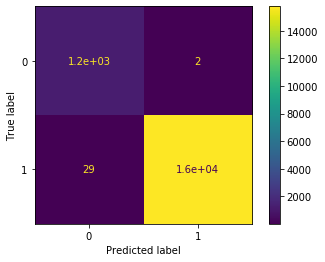

In [32]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test) 

In [33]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.9990188320936857